In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn


from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1) 
X = mnist["data"]

print(X.shape)

data = X[:2000]
print(data.shape)

(70000, 784)
(2000, 784)


In [15]:
# preprocessing the data by subtracting the average of the data from each instance
data_mean = np.mean(data,axis = 0)
preprocessed_data = data - data_mean;
print(preprocessed_data.shape)

(2000, 784)


In [16]:
covar_matrix = np.dot(preprocessed_data.T,preprocessed_data)/len(preprocessed_data)
print(covar_matrix.shape)

(784, 784)


In [17]:
eigenval,eigenvec = np.linalg.eig(covar_matrix)
print(eigenval.shape)
print(eigenvec.shape)

(784,)
(784, 784)


In [18]:
summation_eigenvalues = np.sum(eigenval)
first2_eigenval = eigenval[:2]
print("First 2 eigenvalues:", first2_eigenval)

first3_eigenval = eigenval[:3]
print("First 3 eigenvalues:", first3_eigenval)

first2_summation = np.sum(first2_eigenval)
variance2 = first2_summation/summation_eigenvalues
variance2 = variance2.real
print("Variance for the first 2 eigenvalues:", variance2)

first3_summation = np.sum(first3_eigenval)
variance3 = first3_summation/summation_eigenvalues
variance3 = variance3.real
print("Variance for the first 3 eigenvalues:", variance3)

First 2 eigenvalues: [338999.05064397+0.j 252673.22108496+0.j]
First 3 eigenvalues: [338999.05064397+0.j 252673.22108496+0.j 218909.62067798+0.j]
Variance for the first 2 eigenvalues: 0.1747015499327323
Variance for the first 3 eigenvalues: 0.2393384306097284


In [19]:
first_projection = np.matmul(eigenvec[:,0],preprocessed_data.T)
second_projection = np.matmul(eigenvec[:,1],preprocessed_data.T)
third_projection = np.matmul(eigenvec[:,2],preprocessed_data.T)

twoD_projections = [first_projection,second_projection]
twoD_projections = np.array(twoD_projections)
twoD_projections = twoD_projections.real
print(twoD_projections.shape)

threeD_projections = [first_projection,second_projection,third_projection]
threeD_projections = np.array(threeD_projections)
threeD_projections = threeD_projections.real
print(threeD_projections.shape)

(2, 2000)
(3, 2000)


In [20]:
Y = mnist["target"]
Y = Y[:2000]
print(Y.shape)

(2000,)


In [21]:
data_withLabels = np.vstack((twoD_projections,Y)).T
print(data_withLabels.shape)

(2000, 3)


In [22]:
df = pd.DataFrame(data = data_withLabels, columns = ("1st PC","2nd PC", "Label"))
print(df.head())

        1st PC      2nd PC Label
0  -187.106597  337.294806     5
1 -1085.599877  440.660031     0
2    85.213087  -452.55905     4
3    916.23661  650.877059     1
4   315.563611 -690.961807     9


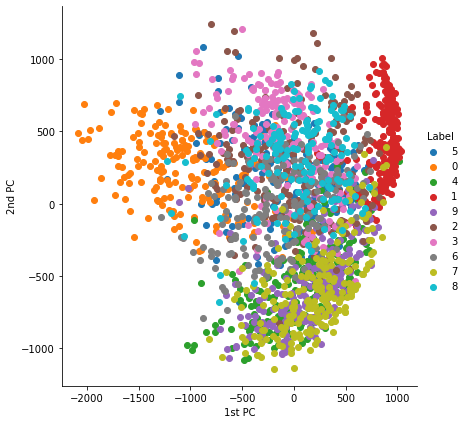

In [23]:
sn.FacetGrid(df, hue = 'Label', height = 6).map(plt.scatter,'1st PC','2nd PC').add_legend()
plt.show()

In [25]:
data_withLabels = np.vstack((threeD_projections,Y)).T
print(data_withLabels.shape)

df = pd.DataFrame(data = data_withLabels, columns = ("1st PC","2nd PC","3rd PC","Label"))
print(df.head())

(2000, 4)
        1st PC      2nd PC      3rd PC Label
0  -187.106597  337.294806 -169.097464     5
1 -1085.599877  440.660031  201.548632     0
2    85.213087  -452.55905  -185.61384     4
3    916.23661  650.877059   66.398676     1
4   315.563611 -690.961807   79.003831     9


Text(0.5, 0, '3rd PC')

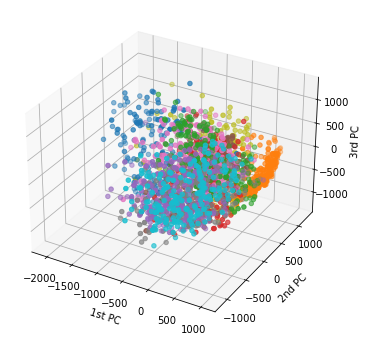

In [26]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

x1 = [[] for i in range(10)]
y1 = [[] for i in range(10)]
z1 = [[] for i in range(10)]

for i in range(len(threeD_projections[0])):
    x1[int(df["Label"][i])].append(threeD_projections[0][i])
    y1[int(df["Label"][i])].append(threeD_projections[1][i])
    z1[int(df["Label"][i])].append(threeD_projections[2][i])

for i in range(10):
    ax.scatter3D(x1[i],y1[i],z1[i])
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')